In [31]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

# Import the time module.
import time

In [20]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [21]:
#add lats and lngs to a list
coordinates = list(lat_lngs)

In [22]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [23]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

596

In [24]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [25]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

#loop through cities in list
for i, city in enumerate(cities):
    
    #group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    #create URL endpoint for city
    city_url = url + '&q=' + city.replace(" ","+")
    
    #log the URL, record, and set numbers and the city
    print(f'Processing Record {record_count} of Set {set_count} | {city}')
    # add 1 to record count
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

          

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | barrow
Processing Record 2 of Set 1 | gravelbourg
Processing Record 3 of Set 1 | pafos
Processing Record 4 of Set 1 | sampit
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | dikson
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | birjand
Processing Record 9 of Set 1 | namatanai
Processing Record 10 of Set 1 | hobart
Processing Record 11 of Set 1 | birin
Processing Record 12 of Set 1 | aklavik
Processing Record 13 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 14 of Set 1 | nanortalik
Processing Record 15 of Set 1 | souillac
Processing Record 16 of Set 1 | lorengau
Processing Record 17 of Set 1 | vaini
Processing Record 18 of Set 1 | boyolangu
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | puerto colombia
Processing Record 21 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 22 of Set 1 | ma

Processing Record 33 of Set 4 | luderitz
Processing Record 34 of Set 4 | kepanjen
Processing Record 35 of Set 4 | celendin
Processing Record 36 of Set 4 | port blair
Processing Record 37 of Set 4 | cabedelo
Processing Record 38 of Set 4 | saint george
Processing Record 39 of Set 4 | rio grande
Processing Record 40 of Set 4 | bengkulu
Processing Record 41 of Set 4 | ribeira grande
Processing Record 42 of Set 4 | hami
Processing Record 43 of Set 4 | burica
City not found. Skipping...
Processing Record 44 of Set 4 | katsuura
Processing Record 45 of Set 4 | sassandra
Processing Record 46 of Set 4 | moissala
Processing Record 47 of Set 4 | lompoc
Processing Record 48 of Set 4 | egvekinot
Processing Record 49 of Set 4 | thompson
Processing Record 50 of Set 4 | goderich
Processing Record 1 of Set 5 | sheridan
Processing Record 2 of Set 5 | mergui
City not found. Skipping...
Processing Record 3 of Set 5 | beringovskiy
Processing Record 4 of Set 5 | pokhara
Processing Record 5 of Set 5 | mayumb

Processing Record 27 of Set 8 | jutai
Processing Record 28 of Set 8 | nyimba
Processing Record 29 of Set 8 | pontianak
Processing Record 30 of Set 8 | dujuma
City not found. Skipping...
Processing Record 31 of Set 8 | manono
Processing Record 32 of Set 8 | yaring
Processing Record 33 of Set 8 | arawa
Processing Record 34 of Set 8 | milingimbi
City not found. Skipping...
Processing Record 35 of Set 8 | rodrigues alves
Processing Record 36 of Set 8 | along
Processing Record 37 of Set 8 | nishihara
Processing Record 38 of Set 8 | mahebourg
Processing Record 39 of Set 8 | vardo
Processing Record 40 of Set 8 | sal rei
Processing Record 41 of Set 8 | ambilobe
Processing Record 42 of Set 8 | abrau-dyurso
Processing Record 43 of Set 8 | inta
Processing Record 44 of Set 8 | hibbing
Processing Record 45 of Set 8 | hamilton
Processing Record 46 of Set 8 | plettenberg bay
Processing Record 47 of Set 8 | sept-iles
Processing Record 48 of Set 8 | wulanhaote
City not found. Skipping...
Processing Rec

Processing Record 14 of Set 12 | kendal
Processing Record 15 of Set 12 | galesong
Processing Record 16 of Set 12 | khor
Processing Record 17 of Set 12 | guapimirim
Processing Record 18 of Set 12 | bajil
Processing Record 19 of Set 12 | lar
Processing Record 20 of Set 12 | wuwei
Processing Record 21 of Set 12 | san ramon de la nueva oran
Processing Record 22 of Set 12 | san patricio
Processing Record 23 of Set 12 | abu samrah
Processing Record 24 of Set 12 | glace bay
Processing Record 25 of Set 12 | vila franca do campo
Processing Record 26 of Set 12 | kargasok
Processing Record 27 of Set 12 | puerto escondido
Processing Record 28 of Set 12 | cockburn town
Processing Record 29 of Set 12 | rhyl
Processing Record 30 of Set 12 | walvis bay
Processing Record 31 of Set 12 | kuna
Processing Record 32 of Set 12 | champasak
Processing Record 33 of Set 12 | loukhi
Processing Record 34 of Set 12 | tabou
Processing Record 35 of Set 12 | carbonia
Processing Record 36 of Set 12 | progreso
Processin

In [26]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Barrow,71.29,-156.79,28.40,79,90,10.29,US,2020-11-02 21:48:28
1,Gravelbourg,49.88,-106.55,66.20,20,0,19.46,CA,2020-11-02 21:48:29
2,Pafos,34.77,32.42,62.60,72,0,6.93,CY,2020-11-02 21:43:33
3,Sampit,-2.53,112.95,74.12,97,100,2.28,ID,2020-11-02 21:44:43
4,Rikitea,-23.12,-134.97,72.30,81,30,18.25,PF,2020-11-02 21:48:30
5,Dikson,73.51,80.55,17.15,96,100,9.78,RU,2020-11-02 21:48:30
6,Ushuaia,-54.80,-68.30,59.00,51,20,6.93,AR,2020-11-02 21:44:44
7,Birjand,32.87,59.22,41.00,15,0,4.70,IR,2020-11-02 21:45:55
8,Namatanai,-3.67,152.43,84.42,72,8,3.18,PG,2020-11-02 21:48:30
9,Hobart,-42.88,147.33,64.99,59,0,10.29,AU,2020-11-02 21:44:34


In [27]:
#reorder columns
new_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Barrow,US,2020-11-02 21:48:28,71.29,-156.79,28.40,79,90,10.29
1,Gravelbourg,CA,2020-11-02 21:48:29,49.88,-106.55,66.20,20,0,19.46
2,Pafos,CY,2020-11-02 21:43:33,34.77,32.42,62.60,72,0,6.93
3,Sampit,ID,2020-11-02 21:44:43,-2.53,112.95,74.12,97,100,2.28
4,Rikitea,PF,2020-11-02 21:48:30,-23.12,-134.97,72.30,81,30,18.25


In [28]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [29]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

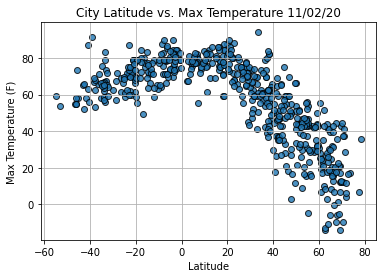

In [32]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()